In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import problema1.src.preprocessing as prepro
import problema1.src.data_handler as data_handler
import problema1.src.utils as utils
import problema1.src.models as models
from problema1.src.models import LogisticRegression
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

cell_diagnosis_dev : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_dev_imbalanced : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_test : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_test.csv')
cell_diagnosis_test_imbalanced : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_test_imbalanced.csv')

Diagnosis: [ True False]
GeneticMutation: [False  True]
CellType_Epthlial: [ True False]
CellType_Mesnchymal: [False  True]
CellType_Unknown: [False  True]
<class 'pandas.core.frame.DataFrame'>
Index: 2132 entries, 3 to 1216
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             2132 non-null   Float64
 1   CellShape            2132 non-null   Float64
 2   NucleusDensity       2132 non-null   Float64
 3   ChromatinTexture     2132 non-null   Float64
 4   CytoplasmSize        2132 non-null   Float64
 5   CellAdhesion         2132 non-null   Float64
 6   MitosisRate          2132 non-null   Float64
 7   NuclearMembrane      2132 non-null   Float64
 8   GrowthFactor         2132 non-null   Float64
 9   OxygenSaturation     2132 non-null   Float64
 10  Vascularization      2132 non-null   Float64
 11  InflammationMarkers  2132 non-null   Float64
 12  Diagnosis            2132 non-null   

# 1 )

## 1.1 )

In [2]:
cell_diagnosis_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1333 non-null   float64
 1   CellShape            1347 non-null   float64
 2   NucleusDensity       1362 non-null   float64
 3   ChromatinTexture     1366 non-null   float64
 4   CytoplasmSize        1347 non-null   float64
 5   CellAdhesion         1369 non-null   float64
 6   MitosisRate          1343 non-null   float64
 7   NuclearMembrane      1343 non-null   float64
 8   GrowthFactor         1359 non-null   float64
 9   OxygenSaturation     1375 non-null   float64
 10  Vascularization      1347 non-null   float64
 11  InflammationMarkers  1358 non-null   float64
 12  Diagnosis            1663 non-null   float64
 13  CellType             1407 non-null   object 
 14  GeneticMutation      1663 non-null   object 
dtypes: float64(13), object(2)
memory usage

In [3]:
print(cell_diagnosis_dev['GeneticMutation'].value_counts()['Presnt'] + cell_diagnosis_dev['GeneticMutation'].value_counts()['Absnt'])
### En la feature GeneticMutation:
###     #Ocurrencias de 'Presnt' + #Ocurrencias de 'Absnt'
###     OUTPUT = 1663
### El output es igual al número de muestras, por lo tanto no hay valores desconocidos para la feature 'GeneticMutation'

1663


In [4]:
cell_diagnosis_dev_processed = prepro.correct_data_types(cell_diagnosis_dev)
cell_diagnosis_dev_processed = prepro.fill_na_values(cell_diagnosis_dev_processed)
cell_diagnosis_dev_processed = prepro.one_hot_encoding(cell_diagnosis_dev_processed, 'CellType')
cell_diagnosis_dev_processed.to_csv(f'{project_root}/TP02/problema1/data/processed/cell_diagnosis_dev_processed.csv', index=False)
cell_diagnosis_dev_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1663 non-null   Float64
 1   CellShape            1663 non-null   Float64
 2   NucleusDensity       1663 non-null   Float64
 3   ChromatinTexture     1663 non-null   Float64
 4   CytoplasmSize        1663 non-null   Float64
 5   CellAdhesion         1663 non-null   Float64
 6   MitosisRate          1663 non-null   Float64
 7   NuclearMembrane      1663 non-null   Float64
 8   GrowthFactor         1663 non-null   Float64
 9   OxygenSaturation     1663 non-null   Float64
 10  Vascularization      1663 non-null   Float64
 11  InflammationMarkers  1663 non-null   Float64
 12  Diagnosis            1663 non-null   bool   
 13  GeneticMutation      1663 non-null   bool   
 14  CellType_Epthlial    1663 non-null   bool   
 15  CellType_Mesnchymal  1663 non-null   b

In [5]:
display(cell_diagnosis_dev_processed.head())
print("")
display(cell_diagnosis_dev_processed.describe())
display(cell_diagnosis_dev_processed.describe(include=["bool"]))

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
0,63.423148,0.500594,1.473261,23.300222,28.448318,0.477657,3.434832,2.492852,60.993969,78.625935,5.727217,41.158399,False,False,True,False,False
1,72.906362,0.474808,1.36136,21.336137,29.856233,0.481035,2.702433,2.281137,63.084699,79.987328,5.319552,40.859154,True,True,True,False,False
2,70.711969,0.481701,1.445035,21.521406,30.582427,0.472651,2.786606,2.318029,61.347022,79.987328,5.068099,40.859154,True,False,False,False,True
3,73.210206,0.498832,1.427612,22.437077,29.88797,0.439511,2.99838,2.149232,64.047169,80.693058,5.068099,37.843069,True,True,False,True,False
4,68.348288,0.498832,1.454116,21.150723,28.328197,0.474836,2.987601,2.414464,62.197197,81.73799,4.347438,43.444881,True,True,True,False,False


,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers
count,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0
mean,82.360121,0.584458,2.034496,25.375571,32.936831,0.473358,4.950468,2.397981,72.638486,91.777082,5.056086,40.641947
std,88.177152,0.50334,4.488109,22.566185,29.606227,0.040661,10.335483,0.218241,69.80439,74.594478,0.554318,4.533329
min,2.735933,0.063622,0.097131,10.0,5.0,0.0,0.0,1.0,0.0,70.0,0.082936,0.0
25%,67.527979,0.485429,1.4094,21.481689,26.826557,0.462142,2.82882,2.290993,58.944305,79.389011,4.860817,38.148935
50%,69.704323,0.498832,1.445035,22.06681,28.448318,0.474836,3.080247,2.414464,60.993969,79.987328,5.068099,40.859154
75%,71.846171,0.516412,1.476913,22.630336,30.090473,0.487328,3.365578,2.490968,62.515962,80.748008,5.243356,42.845185
max,1000.0,5.048566,50.0,263.793425,299.350559,1.0,100.0,5.0,563.622684,807.181058,10.0,82.21663


,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
count,1663,1663,1663,1663,1663
unique,2,2,2,2,2
top,False,True,False,False,False
freq,914,848,1172,1230,924


In [6]:
cell_diagnosis_dev_processed_and_standardized : pd.DataFrame = prepro.standardize_numeric_columns(cell_diagnosis_dev_processed)
cell_diagnosis_dev_processed_and_standardized.to_csv(f'{project_root}/TP02/problema1/data/processed/cell_diagnosis_dev_processed_and_standardized.csv', index=False)
display(cell_diagnosis_dev_processed_and_standardized.head())
print("")
display(cell_diagnosis_dev_processed_and_standardized.describe())

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
0,-0.214761,-0.166614,-0.125049,-0.091967,-0.151607,0.105726,-0.146644,0.434707,-0.166816,-0.176302,1.210733,0.113923,False,False,True,False,False
1,-0.107213,-0.217845,-0.149982,-0.179004,-0.104052,0.188807,-0.217507,-0.535389,-0.136865,-0.158051,0.475297,0.047913,True,True,True,False,False
2,-0.132099,-0.204151,-0.131338,-0.170794,-0.079524,-0.017399,-0.209363,-0.366348,-0.161759,-0.158051,0.02167,0.047913,True,False,False,False,True
3,-0.103767,-0.170116,-0.13522,-0.130217,-0.10298,-0.832414,-0.188873,-1.139791,-0.123077,-0.14859,0.02167,-0.6174,True,True,False,True,False
4,-0.158905,-0.170116,-0.129315,-0.18722,-0.155664,0.036339,-0.189915,0.075527,-0.149579,-0.134582,-1.278416,0.618295,True,True,True,False,False


,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers
count,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0
mean,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.903002,-1.034759,-0.431666,-0.681354,-0.943613,-11.641627,-0.478978,-6.405684,-1.040601,-0.29194,-8.971664,-8.965144
25%,-0.168208,-0.196744,-0.139278,-0.172554,-0.206385,-0.275849,-0.205278,-0.49023,-0.196179,-0.166072,-0.35227,-0.54993
50%,-0.143527,-0.170116,-0.131338,-0.146625,-0.151607,0.036339,-0.180951,0.075527,-0.166816,-0.158051,0.02167,0.047913
75%,-0.119237,-0.135188,-0.124236,-0.121653,-0.096141,0.343572,-0.153345,0.426075,-0.145013,-0.147854,0.337839,0.486009
max,10.406776,8.868974,10.687241,10.565271,8.998571,12.952077,9.196429,11.922703,7.033715,9.590576,8.918919,9.170895


## 1.2 )

In [7]:
train : pd.DataFrame
validation : pd.DataFrame
train, validation = data_handler.get_train_and_validation_sets(cell_diagnosis_dev_processed_and_standardized, train_fraction=0.8, seed=42)

print("Cantidad de muestras del set de entrenamiento: ", train.shape[0])
print("Cantidad de muestras del set de validación:    ", validation.shape[0])

Cantidad de muestras del set de entrenamiento:  1330
Cantidad de muestras del set de validación:     333


In [8]:
log_reg : LogisticRegression = LogisticRegression(train.drop(columns=['Diagnosis']).to_numpy(), train['Diagnosis'].to_numpy(), L2 = 0)
log_reg.fit_gradient_descent(step_size=0.001, tolerance=0.001)

In [9]:
log_reg.predict(validation.drop(columns=['Diagnosis']).to_numpy())
log_reg.evaluate(validation['Diagnosis'].to_numpy())
tp, tn, fp, fn = log_reg.get_confusion_matrix()
print("TP: ", tp)
print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)
print("")
print("ACCURACY             : ", log_reg.get_accuracy())
print("PRECISION            : ", log_reg.get_precision())
print("RECALL               : ", log_reg.get_recall())
print("FALSE POSITIVE RATE  : ", log_reg.get_false_positive_rate())
print("F-SCORE              : ", log_reg.get_f_score())

TP:  116
TN:  155
FP:  28
FN:  34

ACCURACY             :  0.8138138138138138
PRECISION            :  0.8055555555555556
RECALL               :  0.7733333333333333
FALSE POSITIVE RATE  :  0.15300546448087432
F-SCORE              :  0.7891156462585034


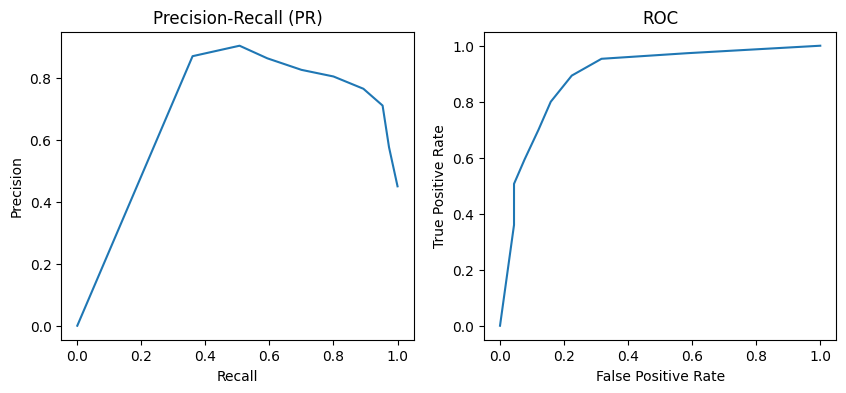

AUC-PR  :  0.5375235097560287
AUC-ROC :  0.8918579234972678


In [10]:
recalls, precisions = log_reg.get_roc_points(validation['Diagnosis'].to_numpy(), k_points=10)
falses_positives_rateses, trues_positives_rateses = log_reg.get_pr_points(validation['Diagnosis'].to_numpy(), k_points=10)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Precision-Recall (PR)")
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.subplot(1, 2, 2)
plt.title("ROC")
plt.plot(falses_positives_rateses, recalls)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("AUC-PR  : ", utils.get_area_under_curve(recalls, precisions))
print("AUC-ROC : ", utils.get_area_under_curve(falses_positives_rateses, recalls))

In [11]:
Ls : np.ndarray = np.arange(0, 20, 0.25)
def cross_validation_regularization_by_f_score(df : pd.DataFrame, Ls : np.ndarray, k_folds : int = 5) -> dict[str, float]:
    F_models : dict[str, float] = {f'gradient_L2_{l}' : [] for l in Ls}
    entries_per_fold : int = int(np.floor(df.shape[0] / k_folds))
    for i in range(1, k_folds + 1):
        train : pd.DataFrame = df.drop(df.index[(i*entries_per_fold) - entries_per_fold : (i*entries_per_fold)])
        validation : pd.DataFrame = df.iloc[(i*entries_per_fold) - entries_per_fold : (i*entries_per_fold)]
        validation_processed = prepro.correct_data_types(validation)
        validation_processed = prepro.fill_na_values(validation_processed) 
        validation_processed = prepro.one_hot_encoding(validation_processed, 'CellType')
        train_processed = prepro.correct_data_types(train)
        train_processed = prepro.fill_na_values(train_processed) 
        train_processed = prepro.one_hot_encoding(train_processed, 'CellType')
        numeric_columns : pd.Index = validation_processed.select_dtypes(include=np.number).columns
        validation_processed_and_standardized : pd.DataFrame = validation_processed
        validation_processed_and_standardized[numeric_columns] = (validation_processed[numeric_columns] - train_processed[numeric_columns].mean()) / train_processed[numeric_columns].std()
        train_processed_and_standardized : pd.DataFrame = prepro.standardize_numeric_columns(train_processed)
        # print(len(train_processed_and_standardized) + len(validation_processed_and_standardized))
        for l in Ls:
            lin_grad_L2 : LogisticRegression = LogisticRegression(train_processed_and_standardized.drop(columns='Diagnosis').to_numpy(), train_processed_and_standardized['Diagnosis'].to_numpy(), L2=l)
            lin_grad_L2.fit_gradient_descent(step_size=0.001, tolerance=0.001)
            lin_grad_L2.predict(validation_processed_and_standardized.drop(columns=['Diagnosis']).to_numpy())
            lin_grad_L2.evaluate(validation_processed_and_standardized['Diagnosis'].to_numpy())
            F_models[f'gradient_L2_{l}'].append(
                lin_grad_L2.get_f_score()
            )
    return F_models
F_models : dict[str, float] = cross_validation_regularization_by_f_score(cell_diagnosis_dev, Ls, k_folds=5)
print(F_models)

{'gradient_L2_0.0': [0.7734375, 0.792156862745098, 0.8291139240506329, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_0.25': [0.7734375, 0.792156862745098, 0.8291139240506329, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_0.5': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_0.75': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_1.0': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_1.25': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8614457831325302], 'gradient_L2_1.5': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8640483383685801], 'gradient_L2_1.75': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8640483383685801], 'gradient_L2_2.0': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8640483383685801], 'gradient_L2_2.25': [0.7734375, 0.796875, 0.832807570977918, 0.820

In [12]:
print("MODEL              F-SCORE MEAN")
F_means : pd.Series = pd.DataFrame(F_models).mean()
print(F_means)

MODEL              F-SCORE MEAN
gradient_L2_0.0      0.814740
gradient_L2_0.25     0.814740
gradient_L2_0.5      0.816423
gradient_L2_0.75     0.816423
gradient_L2_1.0      0.816423
                       ...   
gradient_L2_18.75    0.818637
gradient_L2_19.0     0.819265
gradient_L2_19.25    0.819265
gradient_L2_19.5     0.819265
gradient_L2_19.75    0.819265
Length: 80, dtype: float64


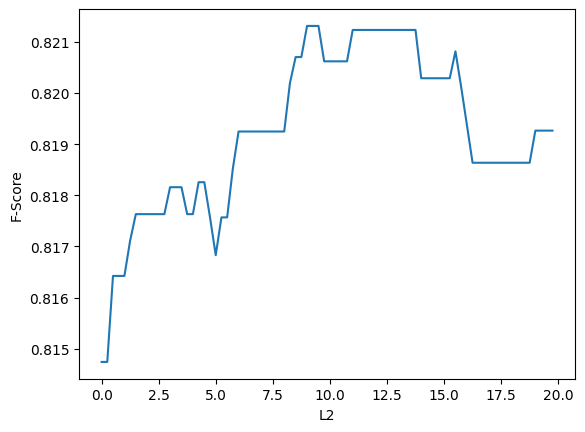

L2 que maximiza F-Score:  9.0


In [13]:
plt.plot(Ls, pd.DataFrame(F_models).mean())
plt.xlabel('L2')
plt.ylabel('F-Score')
plt.show()
print("L2 que maximiza F-Score: ", Ls[np.argmax(F_means)])

## 1.3 )

In [14]:
cell_diagnosis_test_processed_and_standardized : pd.DataFrame = prepro.process_and_stardardize(
    cell_diagnosis_test, 
    filename='cell_diagnosis_test', 
    save_path=f'{project_root}/TP02/problema1/data/processed/'
)
cell_diagnosis_test_processed_and_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             185 non-null    Float64
 1   CellShape            185 non-null    Float64
 2   NucleusDensity       185 non-null    Float64
 3   ChromatinTexture     185 non-null    Float64
 4   CytoplasmSize        185 non-null    Float64
 5   CellAdhesion         185 non-null    Float64
 6   MitosisRate          185 non-null    Float64
 7   NuclearMembrane      185 non-null    Float64
 8   GrowthFactor         185 non-null    Float64
 9   OxygenSaturation     185 non-null    Float64
 10  Vascularization      185 non-null    Float64
 11  InflammationMarkers  185 non-null    Float64
 12  Diagnosis            185 non-null    bool   
 13  GeneticMutation      185 non-null    bool   
 14  CellType_Epthlial    185 non-null    bool   
 15  CellType_Mesnchymal  185 non-null    boo

In [15]:
# Utilizo log_reg, modelo definido en el punto 1.2) con los siguientes parámetros:
# step_size = 0.001, tolerance = 0.001, L2_regularization = 9, threshold = 0.5
train_L2_9 : pd.DataFrame
validation_L2_9 : pd.DataFrame
train_L2_9, validation_L2_9 = data_handler.get_train_and_validation_sets(cell_diagnosis_dev_processed_and_standardized, train_fraction=0.8, seed=42)
log_reg_L2_9 = LogisticRegression(train.drop(columns=['Diagnosis']).to_numpy(), train['Diagnosis'].to_numpy(), L2 = 9)
log_reg_L2_9.fit_gradient_descent(step_size=0.001, tolerance=0.001)
log_reg_L2_9.predict(cell_diagnosis_test_processed_and_standardized.drop(columns=['Diagnosis']).to_numpy())
log_reg_L2_9.evaluate(cell_diagnosis_test_processed_and_standardized['Diagnosis'].to_numpy(), threshold = 0.5)
tp, tn, fp, fn = log_reg_L2_9.get_confusion_matrix()
print("TP: ", tp)
print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)
print("")
log_reg_L2_9.print_metrics()

TP:  66
TN:  93
FP:  9
FN:  17

ACCURACY             :  0.8594594594594595
PRECISION            :  0.88
RECALL               :  0.7951807228915663
FALSE POSITIVE RATE  :  0.08823529411764706
F-SCORE              :  0.8354430379746836


## 1.4 )

In [16]:
# Utilizo modelo con los regularización L2 = 9
# step_size = 0.001, tolerance = 0.001, L2_regularization = 9, threshold = 0.5

In [17]:
# cell_diagnosis_dev_imbalanced
def evaluate_model_1_4(df : pd.DataFrame) -> None:
    train_1_4 : pd.DataFrame
    validation_1_4 : pd.DataFrame
    _df : pd.DataFrame = df.copy()
    train_1_4, validation_1_4 = data_handler.get_train_and_validation_sets(_df, train_fraction=0.8, seed=42)
    log_reg_1_4 : LogisticRegression = LogisticRegression(train_1_4.drop(columns=['Diagnosis']).to_numpy(), train_1_4['Diagnosis'].to_numpy(), L2 = 9)
    log_reg_1_4.fit_gradient_descent(step_size=0.001, tolerance=0.001, max_number_of_steps=100000)
    log_reg_1_4.predict(validation_1_4.drop(columns=['Diagnosis']).to_numpy())
    log_reg_1_4.evaluate(validation_1_4['Diagnosis'].to_numpy(), threshold = 0.5)
    log_reg_1_4.print_metrics()
    recalls, precisions = log_reg_1_4.get_roc_points(validation_1_4['Diagnosis'].to_numpy(), k_points=10)
    falses_positives_rateses, trues_positives_rateses = log_reg_1_4.get_pr_points(validation_1_4['Diagnosis'].to_numpy(), k_points=10)
    print("AUC-PR               : ", utils.get_area_under_curve(recalls, precisions))
    print("AUC-ROC              : ", utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses))
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 2, 1)
    plt.title("Precision-Recall (PR)")
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.subplot(1, 2, 2)
    plt.title("ROC")
    plt.plot(falses_positives_rateses, trues_positives_rateses)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [18]:
# Realizo el rebalanceo con el dataset preprocesado
cell_diagnosis_dev_imbalanced_processed_and_standardized : pd.DataFrame = prepro.process_and_stardardize(
    cell_diagnosis_dev_imbalanced, 
    filename='cell_diagnosis_dev_imbalanced', 
    save_path=f'{project_root}/TP02/problema1/data/processed/'
)

---------------------------------------------------------------
SIN REBALANCEO
---------------------------------------------------------------
ACCURACY             :  0.8647540983606558
PRECISION            :  0.8333333333333334
RECALL               :  0.5263157894736842
FALSE POSITIVE RATE  :  0.03208556149732621
F-SCORE              :  0.6451612903225806
AUC-PR               :  0.5258197115430674
AUC-ROC              :  0.9188948306595365


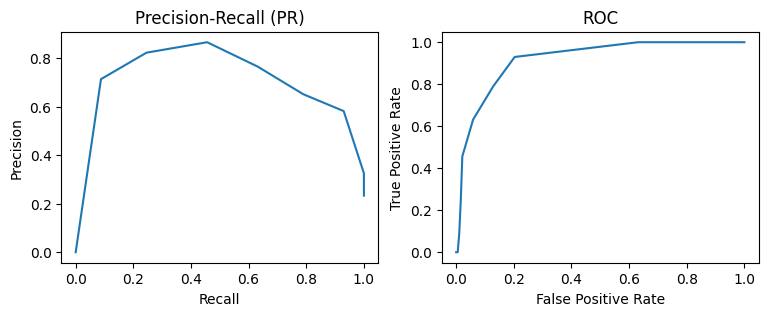

In [19]:
# SIN REBALANCEO
print("---------------------------------------------------------------")
print("SIN REBALANCEO")
print("---------------------------------------------------------------")
evaluate_model_1_4(cell_diagnosis_dev_imbalanced_processed_and_standardized)

---------------------------------------------------------------
UNDERSAMPLING
---------------------------------------------------------------
ACCURACY             :  0.8442622950819673
PRECISION            :  0.8307692307692308
RECALL               :  0.8709677419354839
FALSE POSITIVE RATE  :  0.18333333333333332
F-SCORE              :  0.8503937007874016
AUC-PR               :  0.5283341629357027
AUC-ROC              :  0.9080645161290323


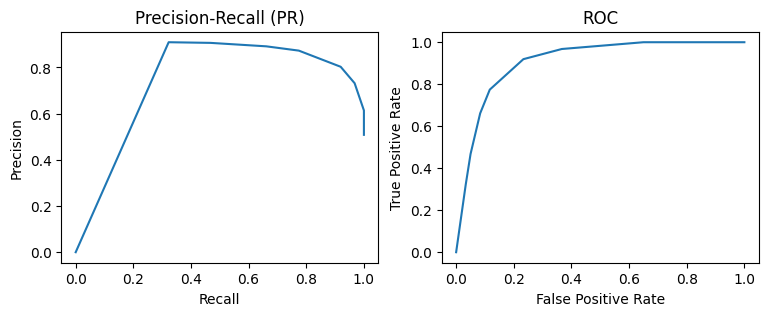

In [20]:
# UNDERSAMPLING 
print("---------------------------------------------------------------")
print("UNDERSAMPLING")
print("---------------------------------------------------------------")
cell_diagnosis_dev_undersampled : pd.DataFrame = prepro.undersample(cell_diagnosis_dev_imbalanced_processed_and_standardized, objective_class='Diagnosis')
evaluate_model_1_4(cell_diagnosis_dev_undersampled)

---------------------------------------------------------------
OVERSAMPLING MEDIANTE DUPLICACIÓN
---------------------------------------------------------------
ACCURACY             :  0.8682926829268293
PRECISION            :  0.35
RECALL               :  0.9333333333333333
FALSE POSITIVE RATE  :  0.1368421052631579
F-SCORE              :  0.509090909090909
AUC-PR               :  0.1033827277338434
AUC-ROC              :  0.9463157894736842


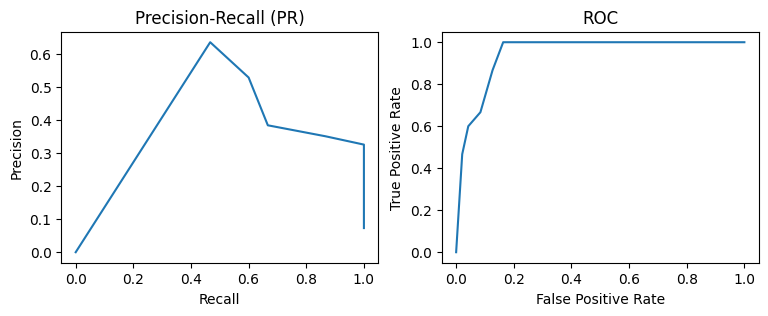

In [21]:
# OVERSAMPLING (DUPLICACIÓN) 
print("---------------------------------------------------------------")
print("OVERSAMPLING MEDIANTE DUPLICACIÓN")
print("---------------------------------------------------------------")
cell_diagnosis_dev_oversampled_by_duplication : pd.DataFrame = prepro.oversample_by_duplication(cell_diagnosis_dev_imbalanced_processed_and_standardized, objective_class='Diagnosis')
evaluate_model_1_4(cell_diagnosis_dev_oversampled_by_duplication)


In [ ]:
# OVERSAMPLING (SMOTE) 
print("---------------------------------------------------------------")
print("OVERSAMPLING MEDIANTE SMOTE")
print("---------------------------------------------------------------")
display(cell_diagnosis_dev_imbalanced_processed_and_standardized.info())
cell_diagnosis_dev_oversampled_by_SMOTE : pd.DataFrame = prepro.oversample_by_SMOTE(cell_diagnosis_dev_imbalanced_processed_and_standardized, objective_class='Diagnosis', k=2)
display(cell_diagnosis_dev_oversampled_by_SMOTE.info())
for col in ['Diagnosis', 'GeneticMutation', 'CellType_Epthlial', 'CellType_Mesnchymal', 'CellType_Unknown']:
    print(f"{col}: {cell_diagnosis_dev_oversampled_by_SMOTE[col].unique()}")
# display(cell_diagnosis_dev_oversampled_by_SMOTE)
evaluate_model_1_4(cell_diagnosis_dev_oversampled_by_SMOTE)


---------------------------------------------------------------
OVERSAMPLING MEDIANTE SMOTE
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1218 non-null   Float64
 1   CellShape            1218 non-null   Float64
 2   NucleusDensity       1218 non-null   Float64
 3   ChromatinTexture     1218 non-null   Float64
 4   CytoplasmSize        1218 non-null   Float64
 5   CellAdhesion         1218 non-null   Float64
 6   MitosisRate          1218 non-null   Float64
 7   NuclearMembrane      1218 non-null   Float64
 8   GrowthFactor         1218 non-null   Float64
 9   OxygenSaturation     1218 non-null   Float64
 10  Vascularization      1218 non-null   Float64
 11  InflammationMarkers  1218 non-null   Float64
 12  Diagnosis            1218 non-nu

None

<class 'pandas.core.frame.DataFrame'>
Index: 2132 entries, 3 to 1216
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             2132 non-null   Float64
 1   CellShape            2132 non-null   Float64
 2   NucleusDensity       2132 non-null   Float64
 3   ChromatinTexture     2132 non-null   Float64
 4   CytoplasmSize        2132 non-null   Float64
 5   CellAdhesion         2132 non-null   Float64
 6   MitosisRate          2132 non-null   Float64
 7   NuclearMembrane      2132 non-null   Float64
 8   GrowthFactor         2132 non-null   Float64
 9   OxygenSaturation     2132 non-null   Float64
 10  Vascularization      2132 non-null   Float64
 11  InflammationMarkers  2132 non-null   Float64
 12  Diagnosis            2132 non-null   bool   
 13  GeneticMutation      2132 non-null   bool   
 14  CellType_Epthlial    2132 non-null   bool   
 15  CellType_Mesnchymal  2132 non-null   bool  

None

Diagnosis: [ True False]
GeneticMutation: [False  True]
CellType_Epthlial: [ True False]
CellType_Mesnchymal: [False  True]
CellType_Unknown: [False  True]


,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
3,-0.124554,-0.127956,-0.153181,-0.205144,-0.138427,1.107272,-0.23441,-0.217663,-0.149227,-0.166292,-0.04184,0.076779,True,False,True,False,False
7,-0.144172,-0.170368,-0.164343,-0.171446,-0.103996,-0.156214,-0.237003,0.107893,-0.158377,-0.201128,0.216897,0.076779,True,True,False,False,True
12,-0.092728,-0.19576,-0.147146,-0.136595,-0.057641,0.931877,-0.242076,0.107893,-0.105295,-0.172827,-1.036151,-1.230641,True,True,False,False,True
14,-0.144172,-0.239854,-0.154797,-0.167098,-0.060312,1.067072,-0.245764,0.107893,-0.124956,-0.161155,0.624683,-0.88647,True,True,False,False,True
22,-0.071377,-0.176719,-0.15805,-0.110649,-0.046993,-1.029672,-0.182413,-1.54359,-0.155613,-0.161155,-0.139934,0.076779,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,-0.144172,-0.188779,-0.127493,-0.192782,-0.228896,-0.22857,-0.182413,0.107893,-0.240749,-0.154258,0.380103,0.076779,False,False,False,False,True
1210,-0.151066,1.134605,0.142501,-0.072185,-0.255058,0.068386,-0.182413,0.107893,-0.177605,-0.192209,-4.408239,0.271184,False,False,False,False,True
1211,-0.144172,-0.125762,-0.134428,-0.0601,-0.115965,1.6145,-0.205673,0.107893,-0.197562,-0.133485,-0.618583,-0.402895,False,True,True,False,False
1212,-0.075987,-0.219284,-0.136982,-0.124393,0.085761,-1.390658,-0.231512,-2.140757,-0.167634,-0.181984,0.025204,-2.1426,False,True,False,True,False


## 1.5 )